<a href="https://colab.research.google.com/github/alneka/CUDA-training/blob/master/CellParam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-fde5b940e6f9>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["X", "J1", "J2", "J3"])


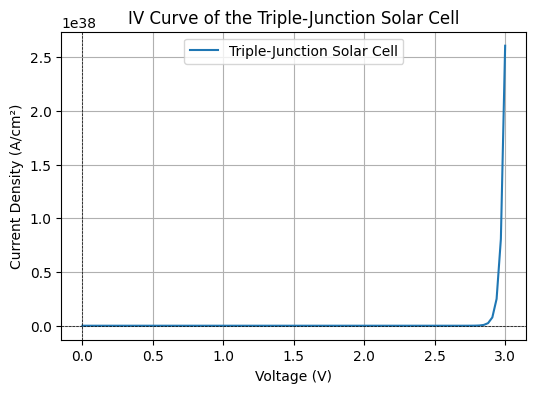

In [ ]:
# Reload necessary libraries since execution state was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19  # Elementary charge (C)
k = 1.38e-23   # Boltzmann constant (J/K)
T = 300        # Temperature in Kelvin

# Assumed diode reverse saturation current densities (A/cm²) for each junction
J0 = 1e-12

# Load the data into a DataFrame
file_path = "/content/drive/MyDrive/Cur SC=5.00_St_0.00 F=105.45 SLF=59.75_0_91_.dat"
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["X", "J1", "J2", "J3"])

# Compute the limiting photocurrent (smallest among the three junctions)
Jph_min = np.minimum.reduce([data["J1"], data["J2"], data["J3"]])

# Average photocurrent density for the limiting junction
Jph_avg = np.mean(Jph_min)

# Voltage range for IV curve
V = np.linspace(0, 3, 100)  # Extending voltage up to 3V for multi-junction cells

# Compute IV characteristics for the triple-junction solar cell
J_total = J0 * (np.exp(q * V / (k * T)) - 1) - Jph_avg

# Plot IV curve
plt.figure(figsize=(6, 4))
plt.plot(V, J_total, label="Triple-Junction Solar Cell")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Voltage (V)")
plt.ylabel("Current Density (A/cm²)")
plt.title("IV Curve of the Triple-Junction Solar Cell")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(Jph_avg)


34.265374808691696


In [ ]:
(V, J_total)

(array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
        0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
        0.3030303 , 0.33333333, 0.36363636, 0.39393939, 0.42424242,
        0.45454545, 0.48484848, 0.51515152, 0.54545455, 0.57575758,
        0.60606061, 0.63636364, 0.66666667, 0.6969697 , 0.72727273,
        0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
        0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303,
        1.06060606, 1.09090909, 1.12121212, 1.15151515, 1.18181818,
        1.21212121, 1.24242424, 1.27272727, 1.3030303 , 1.33333333,
        1.36363636, 1.39393939, 1.42424242, 1.45454545, 1.48484848,
        1.51515152, 1.54545455, 1.57575758, 1.60606061, 1.63636364,
        1.66666667, 1.6969697 , 1.72727273, 1.75757576, 1.78787879,
        1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394,
        1.96969697, 2.        , 2.03030303, 2.06060606, 2.09090909,
        2.12121212, 2.15151515, 2.18181818, 2.21

<ipython-input-3-922b796f819a>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["X", "J1", "J2", "J3"])
<ipython-input-3-922b796f819a>:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Jph_total = np.trapz(2 * np.pi * data["R"] * Jph_min, data["R"]) / (np.pi * max(data["R"])**2)


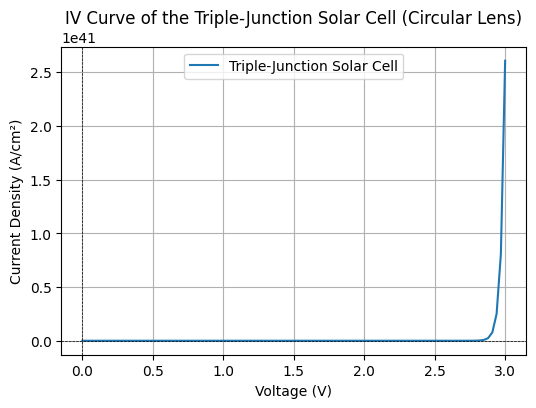

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19  # Elementary charge (C)
k = 1.38e-23   # Boltzmann constant (J/K)
T = 300        # Temperature in Kelvin

# Assumed diode reverse saturation current density (A/cm²) for each junction
J0 = 1e-9

# Load the new dataset
file_path = "/content/drive/MyDrive/Cur SC=5.00_St_0.00 F=105.45 SLF=59.75_0_91_.dat"
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["X", "J1", "J2", "J3"])

# Convert X to radial coordinate assuming circular symmetry
data["R"] = np.abs(data["X"])  # Since it's a projection along the center

# Compute the limiting photocurrent (smallest among the three junctions)
Jph_min = np.minimum.reduce([data["J1"], data["J2"], data["J3"]])

# Integrate over the circular area to estimate total photocurrent
# Assuming a symmetric extension around R=0
Jph_total = np.trapz(2 * np.pi * data["R"] * Jph_min, data["R"]) / (np.pi * max(data["R"])**2)

# Voltage range for IV curve
V = np.linspace(0, 3, 100)  # Extending voltage up to 3V for multi-junction cells

# Compute IV characteristics for the triple-junction solar cell
J_total = J0 * (np.exp(q * V / (k * T)) - 1) - Jph_total

# Plot IV curve
plt.figure(figsize=(6, 4))
plt.plot(V, J_total, label="Triple-Junction Solar Cell")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("Voltage (V)")
plt.ylabel("Current Density (A/cm²)")
plt.title("IV Curve of the Triple-Junction Solar Cell (Circular Lens)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
J_total

array([5.60410721e-04, 5.60412952e-04, 5.60420157e-04, 5.60443431e-04,
       5.60518616e-04, 5.60761491e-04, 5.61546067e-04, 5.64080535e-04,
       5.72267794e-04, 5.98715639e-04, 6.84151866e-04, 9.60142170e-04,
       1.85169193e-03, 4.73172419e-03, 1.40352832e-02, 4.40891862e-02,
       1.41174300e-01, 4.54794776e-01, 1.46790377e+00, 4.74061689e+00,
       1.53126789e+01, 4.94643111e+01, 1.59786591e+02, 5.16167961e+02,
       1.66741031e+03, 5.38634474e+03, 1.73998650e+04, 5.62079354e+04,
       1.81572216e+05, 5.86544757e+05, 1.89475439e+06, 6.12075061e+06,
       1.97722662e+07, 6.38716614e+07, 2.06328859e+08, 6.66517783e+08,
       2.15309655e+09, 6.95529042e+09, 2.24681354e+10, 7.25803063e+10,
       2.34460972e+11, 7.57394810e+11, 2.44666263e+12, 7.90361639e+12,
       2.55315756e+13, 8.24763401e+13, 2.66428786e+14, 8.60662556e+14,
       2.78025527e+15, 8.98124280e+15, 2.90127036e+16, 9.37216585e+16,
       3.02755282e+17, 9.78010446e+17, 3.15933193e+18, 1.02057992e+19,
      